### Benchmark on the entire dataset

#### result in multiple files under a directory

In [13]:
import os
import re
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm

def extract_info(text):
    line = text
    if "Start Time: " in line and  "End Time: " in line and  "Transcript: " in line and "Latency: " in line:
        start_time = float(line.split("Start Time: ")[1].split(",")[0])
        end_time = float(line.split("End Time: ")[1].split(",")[0])
        transcript = line.split("Transcript: ")[1].split(", Latency: ")[0]  # Keep spaces as they are
        latency = float(line.split("Latency: ")[1])
        
        return start_time, end_time, transcript, latency
    else:
        return None
    
def process_log(directory_path):
    print(directory_path)
    df = pd.DataFrame(columns=['audio', 'start_time', 'end_time', 'transcript', 'latency'])
    files = os.listdir(directory_path)
    file_names = [os.path.join(directory_path, f) for f in files if (os.path.isfile(os.path.join(directory_path, f)) and '_1500_serialized.log' in f)]
    file_names.sort()
    print(file_names)
    print("The file count: " + str(len(file_names)))
    success_count = 0
    for file_path in file_names:
        with open(file_path, errors="ignore") as f:
            audio = None
            start_and_end_time_set = set()
            for line in tqdm(f.readlines()):
                if line.strip().endswith(".wav"):
                    audio = line.strip()
                    start_and_end_time_set = set()
                    continue
                elif (ret := extract_info(line)) is not None:
                    start_time, end_time, transcript, latency = ret
                    #print(transcript)
                    #if (start_time, end_time) in start_and_end_time_set:
                    #    continue
                    #else:
                    start_and_end_time_set.add((start_time, end_time))
                    df_new = pd.DataFrame([{
                        'audio': audio,
                        'start_time': start_time,
                        'end_time': end_time,
                        'transcript': transcript,
                        'latency': latency}]
                    )
                    df = pd.concat([df, df_new], ignore_index=True)
                elif "Average latency" in line:
                    print(file_path)
                    success_count += 1
    print("The success file count: " + str(success_count))
    return df

In [14]:
result_dir = "benchmarking_results"
exp_name = "whisperflow_serialized"
model_type = "medium"
log_file = "ted-long-form-test-cut"

file_path = os.path.join(result_dir, exp_name, model_type, log_file)

df = process_log(file_path)

benchmarking_results/whisperflow_serialized/medium/ted-long-form-test-cut
['benchmarking_results/whisperflow_serialized/medium/ted-long-form-test-cut/AimeeMullins-merged.wavsegment_1_step_len_1500_serialized.log', 'benchmarking_results/whisperflow_serialized/medium/ted-long-form-test-cut/AimeeMullins-merged.wavsegment_2_step_len_1500_serialized.log', 'benchmarking_results/whisperflow_serialized/medium/ted-long-form-test-cut/AimeeMullins-merged.wavsegment_3_step_len_1500_serialized.log', 'benchmarking_results/whisperflow_serialized/medium/ted-long-form-test-cut/AimeeMullins-merged.wavsegment_4_step_len_1500_serialized.log', 'benchmarking_results/whisperflow_serialized/medium/ted-long-form-test-cut/BillGates-merged.wavsegment_1_step_len_1500_serialized.log', 'benchmarking_results/whisperflow_serialized/medium/ted-long-form-test-cut/BillGates-merged.wavsegment_2_step_len_1500_serialized.log', 'benchmarking_results/whisperflow_serialized/medium/ted-long-form-test-cut/BillGates-merged.wavse

  0%|          | 0/37325 [00:00<?, ?it/s]/var/folders/q8/v4sscjhd6szcgb36c6hggw5w0000gq/T/ipykernel_45744/1313081779.py:51: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, df_new], ignore_index=True)
 99%|█████████▉| 36869/37325 [00:00<00:00, 368601.59it/s]

benchmarking_results/whisperflow_serialized/medium/ted-long-form-test-cut/AimeeMullins-merged.wavsegment_1_step_len_1500_serialized.log

100%|██████████| 37325/37325 [00:00<00:00, 144867.66it/s]


100%|██████████| 37264/37264 [00:00<00:00, 88919.89it/s] 

benchmarking_results/whisperflow_serialized/medium/ted-long-form-test-cut/AimeeMullins-merged.wavsegment_2_step_len_1500_serialized.log



100%|██████████| 36132/36132 [00:00<00:00, 63648.90it/s] 

benchmarking_results/whisperflow_serialized/medium/ted-long-form-test-cut/AimeeMullins-merged.wavsegment_3_step_len_1500_serialized.log



100%|██████████| 44558/44558 [00:00<00:00, 50348.36it/s] 


benchmarking_results/whisperflow_serialized/medium/ted-long-form-test-cut/AimeeMullins-merged.wavsegment_4_step_len_1500_serialized.log


100%|██████████| 40133/40133 [00:01<00:00, 39152.16it/s] 


benchmarking_results/whisperflow_serialized/medium/ted-long-form-test-cut/BillGates-merged.wavsegment_1_step_len_1500_serialized.log


100%|██████████| 39251/39251 [00:01<00:00, 32001.41it/s] 


benchmarking_results/whisperflow_serialized/medium/ted-long-form-test-cut/BillGates-merged.wavsegment_2_step_len_1500_serialized.log


100%|██████████| 38421/38421 [00:01<00:00, 24885.81it/s] 


benchmarking_results/whisperflow_serialized/medium/ted-long-form-test-cut/BillGates-merged.wavsegment_3_step_len_1500_serialized.log


100%|██████████| 39769/39769 [00:01<00:00, 22422.60it/s] 


benchmarking_results/whisperflow_serialized/medium/ted-long-form-test-cut/BillGates-merged.wavsegment_4_step_len_1500_serialized.log


100%|██████████| 42947/42947 [00:02<00:00, 19587.37it/s] 


benchmarking_results/whisperflow_serialized/medium/ted-long-form-test-cut/BillGates-merged.wavsegment_5_step_len_1500_serialized.log


100%|██████████| 40335/40335 [00:02<00:00, 17001.33it/s] 


benchmarking_results/whisperflow_serialized/medium/ted-long-form-test-cut/DanBarber-merged.wavsegment_1_step_len_1500_serialized.log


100%|██████████| 41497/41497 [00:02<00:00, 15837.17it/s] 


benchmarking_results/whisperflow_serialized/medium/ted-long-form-test-cut/DanBarber-merged.wavsegment_2_step_len_1500_serialized.log


100%|██████████| 30861/30861 [00:02<00:00, 14439.07it/s] 


benchmarking_results/whisperflow_serialized/medium/ted-long-form-test-cut/DanBarber-merged.wavsegment_3_step_len_1500_serialized.log


100%|██████████| 38700/38700 [00:02<00:00, 14618.86it/s] 


benchmarking_results/whisperflow_serialized/medium/ted-long-form-test-cut/DanielKahneman-merged.wavsegment_1_step_len_1500_serialized.log


100%|██████████| 39580/39580 [00:03<00:00, 13084.25it/s] 


benchmarking_results/whisperflow_serialized/medium/ted-long-form-test-cut/DanielKahneman-merged.wavsegment_2_step_len_1500_serialized.log


100%|██████████| 39400/39400 [00:03<00:00, 12864.01it/s] 


benchmarking_results/whisperflow_serialized/medium/ted-long-form-test-cut/DanielKahneman-merged.wavsegment_3_step_len_1500_serialized.log


100%|██████████| 24828/24828 [00:02<00:00, 12376.36it/s] 


benchmarking_results/whisperflow_serialized/medium/ted-long-form-test-cut/DanielKahneman-merged.wavsegment_4_step_len_1500_serialized.log


100%|██████████| 44043/44043 [00:04<00:00, 10577.70it/s] 


benchmarking_results/whisperflow_serialized/medium/ted-long-form-test-cut/EricMead_2009P_EricMead-merged.wavsegment_1_step_len_1500_serialized.log


100%|██████████| 24166/24166 [00:02<00:00, 9792.05it/s]  


benchmarking_results/whisperflow_serialized/medium/ted-long-form-test-cut/EricMead_2009P_EricMead-merged.wavsegment_2_step_len_1500_serialized.log


100%|██████████| 49742/49742 [00:05<00:00, 9457.15it/s]  


benchmarking_results/whisperflow_serialized/medium/ted-long-form-test-cut/GaryFlake-merged.wavsegment_1_step_len_1500_serialized.log


100%|██████████| 39368/39368 [00:04<00:00, 8904.53it/s]  


benchmarking_results/whisperflow_serialized/medium/ted-long-form-test-cut/JamesCameron-merged.wavsegment_1_step_len_1500_serialized.log


100%|██████████| 42269/42269 [00:05<00:00, 7999.74it/s]  


benchmarking_results/whisperflow_serialized/medium/ted-long-form-test-cut/JamesCameron-merged.wavsegment_2_step_len_1500_serialized.log


100%|██████████| 40696/40696 [00:05<00:00, 8060.89it/s]  


benchmarking_results/whisperflow_serialized/medium/ted-long-form-test-cut/JamesCameron-merged.wavsegment_3_step_len_1500_serialized.log


100%|██████████| 10554/10554 [00:01<00:00, 8748.68it/s] 


benchmarking_results/whisperflow_serialized/medium/ted-long-form-test-cut/JamesCameron-merged.wavsegment_4_step_len_1500_serialized.log


100%|██████████| 43265/43265 [00:05<00:00, 7330.71it/s]  


benchmarking_results/whisperflow_serialized/medium/ted-long-form-test-cut/JaneMcGonigal-merged.wavsegment_1_step_len_1500_serialized.log


100%|██████████| 43714/43714 [00:05<00:00, 7363.93it/s]  


benchmarking_results/whisperflow_serialized/medium/ted-long-form-test-cut/JaneMcGonigal-merged.wavsegment_2_step_len_1500_serialized.log


100%|██████████| 42155/42155 [00:06<00:00, 6761.60it/s]  


benchmarking_results/whisperflow_serialized/medium/ted-long-form-test-cut/JaneMcGonigal-merged.wavsegment_3_step_len_1500_serialized.log


100%|██████████| 39793/39793 [00:06<00:00, 6564.21it/s]  


benchmarking_results/whisperflow_serialized/medium/ted-long-form-test-cut/JaneMcGonigal-merged.wavsegment_4_step_len_1500_serialized.log


100%|██████████| 44740/44740 [00:07<00:00, 5794.49it/s]  


benchmarking_results/whisperflow_serialized/medium/ted-long-form-test-cut/MichaelSpecter-merged.wavsegment_1_step_len_1500_serialized.log


100%|██████████| 44877/44877 [00:07<00:00, 5800.80it/s]  


benchmarking_results/whisperflow_serialized/medium/ted-long-form-test-cut/MichaelSpecter-merged.wavsegment_2_step_len_1500_serialized.log


100%|██████████| 47611/47611 [00:08<00:00, 5777.13it/s]  


benchmarking_results/whisperflow_serialized/medium/ted-long-form-test-cut/MichaelSpecter-merged.wavsegment_3_step_len_1500_serialized.log


100%|██████████| 45838/45838 [00:07<00:00, 5825.86it/s]  

benchmarking_results/whisperflow_serialized/medium/ted-long-form-test-cut/RobertGupta-merged.wavsegment_1_step_len_1500_serialized.log
The success file count: 31


In [15]:
print(df.latency.min())
print(df.latency.mean())

-0.45
3.0906173605283316


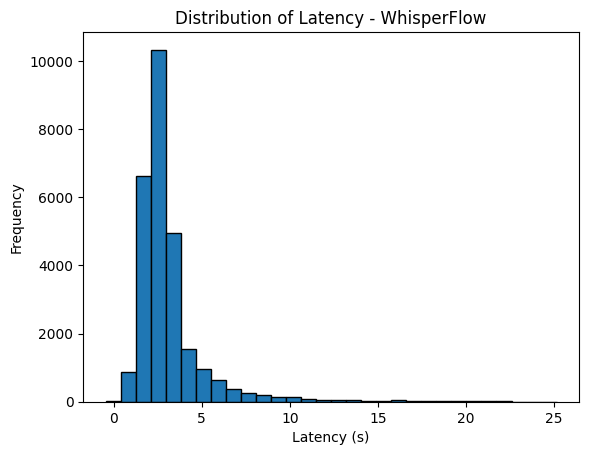

In [16]:
plt.hist(df.latency, bins=30, edgecolor='black')  # 'bins' controls the number of intervals
plt.xlabel('Latency (s)')
plt.ylabel('Frequency')
plt.title('Distribution of Latency - WhisperFlow')
plt.show()

In [17]:
final_res = ''
for i in df['transcript']:
    final_res += i
print(final_res[:200])
print(len(final_res))

with open("tmp.txt", "w") as file:
    file.write(final_res)

 i'd like to share with you a discovery that i made a few months ago while writing an article for italianwired i always keep my thesaurus handy whenever i'm writing anything but i'd already finished e
134384


In [18]:
import subprocess
command = [
    "python", 
    "wer/main.py", 
    "tmp.txt", 
    "samples/ted-lium-long-form-test-combined-transcript.txt", 
    "True"
]

result = subprocess.run(command, capture_output=True, text=True)
print("Output:", result.stdout)
print("Errors:", result.stderr)

Output: Average length of predictions and references: 
27509.0
27848.0

Normalisation: True
Word Error Rate: 0.05026733940808796
Accuracy: 95.0%


Errors: /Users/rxpwang/miniconda3/lib/python3.12/site-packages/whisper/__init__.py:150: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full contro